# Common Workflow Language with BioExcel Building Blocks
### Based on the Protein MD Setup tutorial using BioExcel Building Blocks (biobb)
***
This tutorial aims to illustrate the process of **building up a CWL workflow** using the **BioExcel Building Blocks library (biobb)**. The tutorial is based on the **Protein Gromacs MD Setup** [Jupyter Notebook tutorial](https://github.com/bioexcel/biobb_wf_md_setup). 
***
**Biobb modules** used:

 - [biobb_io](https://github.com/bioexcel/biobb_io): Tools to fetch biomolecular data from public databases.
 - [biobb_model](https://github.com/bioexcel/biobb_model): Tools to model macromolecular structures.
 - [biobb_md](https://github.com/bioexcel/biobb_md): Tools to setup and run Molecular Dynamics simulations.
 - [biobb_analysis](https://github.com/bioexcel/biobb_analysis): Tools to analyse Molecular Dynamics trajectories.
 
**Software requirements**:

 - [cwltool](https://github.com/common-workflow-language/cwltool): Common Workflow Language tool description reference implementation.
 - [docker](https://www.docker.com/): Docker container platform.

***
### Tutorial Sections:
 1. [CWL workflows: Brief Introduction](#intro)
 
 
 2. [BioExcel building blocks TOOLS CWL Descriptions](#tools)
 
     * [Tool Building Block CWL Sections](#toolcwl)
     * [Complete Pdb Building Block CWL description](#pdbcwl)
     
 
 3. [BioExcel building blocks WORKFLOWS CWL Descriptions](#workflows)
 
     * [Header](#cwlheader)
     * [Inputs](#inputs)
     * [Outputs](#outputs)
     * [Steps](#steps)
     * [Input of a Run](#run)
     * [Complete Workflow](#wf)
     * [Running the CWL workflow](#runwf)
     * [Cwltool workflow output](#wfoutput)
 
 
 4. [Protein MD-Setup CWL workflow with BioExcel building blocks](#mdsetup)
 
     * [Steps](#mdsteps)
     * [Inputs](#mdinputs)
     * [Outputs](#mdoutputs)
     * [Complete Workflow](#mdworkflow)
     * [Input of a Run](#mdrun)
     * [Running the CWL workflow](#mdcwlrun)

 
 5. [Questions & Comments](#questions)

***
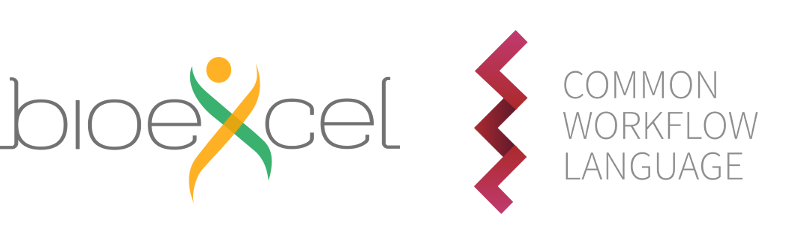
***


<a id="intro"></a>
## CWL workflows: Brief Introduction

The **Common Workflow Language (CWL)** is an open standard for describing analysis **workflows and tools** in a way that makes them **portable and scalable** across a variety of software and hardware environments, from workstations to cluster, cloud, and high performance computing (HPC) environments.

**CWL** is a community-led specification to express **portable workflow and tool descriptions**, which can be executed by **multiple leading workflow engine implementations**. Unlike previous standardisation attempts, CWL has taken a pragmatic approach and focused on what most workflow systems are able to do: Execute command line tools and pass files around in a top-to-bottom pipeline. At the heart of CWL workflows are the **tool descriptions**. A command line is described, with parameters, input and output files, in a **YAML format** so they can be shared across workflows and linked to from registries like **ELIXIR’s bio.tools**. These are then combined and wired together in a **second YAML file** to form a workflow template, which can be **executed on any of the supported implementations**, repeatedly and **on different platforms** by specifying input files and workflow parameters. The [CWL User Guide](https://www.commonwl.org/user_guide/index.html) gives a gentle introduction to the language, while the more detailed [CWL specifications](https://www.commonwl.org/v1.1/) formalize CWL concepts so they can be implemented by the different workflow systems. A couple of **BioExcel webinars** were focused on **CWL**, an [introduction to CWL](https://www.youtube.com/watch?v=jfQb1HJWRac) and a [new open source tool to run CWL workflows on LSF (CWLEXEC)](https://www.youtube.com/watch?v=_jSTZMWtPAY).

**BioExcel building blocks** are all **described in CWL**. A specific **CWL** section in the **workflow manager adapters** [github repository](https://github.com/bioexcel/biobb_adapters/tree/master/biobb_adapters/cwl) gathers all the descriptions, divided in the different categories: io, md, analysis, chemistry, model and pmx (see updated table [here](http://mmb.irbbarcelona.org/webdev/slim/biobb/public/availability/source)).

In this tutorial, we are going to use these **BioExcel building blocks CWL descriptions** to build a **CWL** biomolecular workflow. In particular, the assembled workflow will perform a complete **Molecular Dynamics setup** (MD Setup) using **GROMACS MD package**, taking as a base the **Protein Gromacs MD Setup** [Jupyter Notebook tutorial](https://github.com/bioexcel/biobb_wf_md_setup). 

No additional installation is required apart from the **Docker platform** and the **CWL tool reference executor**, as the **building blocks** will be launched using their associated **Docker containers**.  

***
<a id="tools"></a>

## BioExcel building blocks TOOLS CWL Descriptions

Writing a workflow in CWL using the **BioExcel building blocks** is possible thanks to the already generated **CWL descriptions** for all the **building blocks** (wrappers). A specific **CWL** section in the **workflow manager adapters** [github repository](https://github.com/bioexcel/biobb_adapters/tree/master/biobb_adapters/cwl) gathers all the descriptions, divided in the different categories: io, md, analysis, chemistry, model and pmx (see updated table [here](http://mmb.irbbarcelona.org/webdev/slim/biobb/public/availability/source)).

***
<a id="toolcwl"></a>
### Tool Building Block CWL sections:

**Example**: Step 1 of the workflow, download a **protein structure** from the **PDB database**. The building block used for this is the [Pdb](https://github.com/bioexcel/biobb_io/blob/master/biobb_io/api/pdb.py) building block, from the [biobb_io](https://github.com/bioexcel/biobb_io) package, including tools to **fetch biomolecular data from public databases**. The **CWL description** for this building block can be found in the [adapters github repo](https://github.com/bioexcel/biobb_adapters/blob/master/biobb_adapters/cwl/biobb_io/mmb_api/pdb.cwl), and is shown in the following notebook cell. Description files like this one for all the steps of the workflow are needed to build and run a **CLW workflow**. To build a **CWL workflow** with **BioExcel building blocks**, one just need to download all the needed description files from the [biobb_adapters github](https://github.com/bioexcel/biobb_adapters/blob/master/biobb_adapters/cwl). 

This particular example of a **Pdb building block** is useful to illustrate the most important points of the **CWL description**:
* **hints**: The **CWL hints** section describes the **process requirements** that should (but not have to) be satisfied to run the wrapped command. The implementation may report a **warning** if a hint cannot be satisfied. In the **BioExcel building blocks**, a **DockerRequirement** subsection is always present in the **hints** section, pointing to the associated **Docker container**. The **dockerPull: parameter** takes the same value that you would pass to a **docker pull** command. That is, the name of the **container image**. In this case we have used the container called **biobb_io:latest** that can be found in the **quay.io repository**, which contains the **Pdb** building block.

In [ ]:
hints:
  DockerRequirement:
    dockerPull: quay.io/biocontainers/biobb_io:latest

* **namespaces and schemas**: Input and output **metadata** may be represented within a tool or workflow. Such **metadata** must use a **namespace prefix** listed in the **$namespaces and $schemas sections** of the document. All **BioExcel building blocks CWL specifications** use the **EDAM ontology** (http://edamontology.org/) as **namespace**, with all terms included in its **Web Ontology Language** (owl) of knowledge representation (http://edamontology.org/EDAM_1.22.owl). **BioExcel** is contributing to the expansion of the **EDAM ontology** with the addition of new structural terms such as [GROMACS XTC format](http://edamontology.org/format_3875) or the [trajectory visualization operation](http://edamontology.org/operation_3890).

In [ ]:
$namespaces:
  edam: http://edamontology.org/
$schemas:
  - http://edamontology.org/EDAM_1.22.owl

* **inputs**: The **inputs section** of a **tool** contains a list of input parameters that **control how to run the tool**. Each parameter has an **id** for the name of parameter, and **type** describing what types of values are valid for that parameter. Available primitive types are *string, int, long, float, double, and null*; complex types are *array and record*; in addition there are special types *File, Directory and Any*. The field **inputBinding** is optional and indicates whether and how the input parameter should appear on the tool’s command line, in which **position** (position), and with which **name** (prefix). The **default field** stores the **default value** for the particular **input parameter**. <br>In this particular example, the **Pdb building block** has two different **input parameters**: *output_pdb_path* and *config*. The *output_pdb_path* input parameter defines the name of the **output file** that will contain the downloaded **PDB structure**. The *config* parameter is common to all **BioExcel building blocks**, and gathers all the **properties** of the building block in a **json format**. The **question mark** after the string type (*string?*) denotes that this input is **optional**. 

In [ ]:
inputs:
  output_pdb_path:
    type: string
    inputBinding:
      position: 1
      prefix: --output_pdb_path
    default: "downloaded_structure.pdb"

  config:
    type: string?
    inputBinding:
      position: 2
      prefix: --config
    default: "{\"pdb_code\" : \"1aki\"}"

* **outputs**: The **outputs section** of a **tool** contains a list of output parameters that should be returned after running the **tool**. Similarly to the inputs section, each parameter has an **id** for the name of parameter, and **type** describing what types of values are valid for that parameter. The **outputBinding** field describes how to set the value of each output parameter. The **glob field** consists of the name of a file in the **output directory**. In the **BioExcel building blocks**, every **output** has an associated **input parameter** defined in the previous input section, defining the name of the file to be generated. <br>In the particular **Pdb building block** example, the *output_pdb_file* parameter of type *File* is coupled to the *output_pdb_path* input parameter, using the **outputBinding** and the **glob** fields. The standard **PDB** format of the output file is also specified using the **EDAM ontology** format id 1476 ([edam:format_1476](http://edamontology.org/format_1476)).     

In [ ]:
outputs:
  output_pdb_file:
    type: File
    format: edam:format_1476
    outputBinding:
      glob: $(inputs.output_pdb_path)

For more information on CWL tools description, please refer to the [CWL User Guide](https://www.commonwl.org/user_guide/index.html) or the [CWL specifications](https://www.commonwl.org/v1.1/).
***
<a id="pdbcwl"></a>
### Complete Pdb Building Block CWL description:

Example of a **BioExcel building block CWL description** (pdb from biobb_io package)

In [ ]:
# Example of a BioExcel building block CWL description (pdb from biobb_io package)

#!/usr/bin/env cwl-runner
cwlVersion: v1.0
class: CommandLineTool
baseCommand: pdb
hints:
  DockerRequirement:
    dockerPull: quay.io/biocontainers/biobb_io:latest
            
inputs:
  output_pdb_path:
    type: string
    inputBinding:
      position: 1
      prefix: --output_pdb_path
    default: "downloaded_structure.pdb"

  config:
    type: string?
    inputBinding:
      position: 2
      prefix: --config
    default: "{\"pdb_code\" : \"1aki\"}"
        
outputs:
  output_pdb_file:
    type: File
    format: edam:format_1476
    outputBinding:
      glob: $(inputs.output_pdb_path)

$namespaces:
  edam: http://edamontology.org/
$schemas:
  - http://edamontology.org/EDAM_1.22.owl

***
<a id="workflows"></a>
## BioExcel building blocks WORKFLOWS CWL Descriptions

Now that we have seen the **BioExcel building blocks CWL descriptions**, we can use them to build our first **biomolecular workflow** as a demonstrator. All **CWL workflows** are divided in **two files**: the **CWL description** and the **YAML** or **JSON** files containing **all workflow inputs**. Starting with the **CWL workflow description**, let's explore our first example **section by section**.
<a id="cwlheader"></a>
### Header:

* **cwlVersion** field indicates the version of the **CWL spec** used by the document.
* **class** field indicates this document describes a **workflow**.

In [ ]:
# !/usr/bin/env cwl-runner

cwlVersion: v1.0
class: Workflow

<a id="inputs"></a>
### Inputs:

The **inputs section** describes the inputs for **each of the steps** of the workflow. The **BioExcel building blocks (biobb)** have three types of **input parameters**: **input**, **output**, and **properties**. The **properties** parameter, which contains all the input parameters that are neither **input** nor **output files**, is defined in **JSON format** (see examples in the **Protein MD Setup** [Jupyter Notebook tutorial](https://github.com/bioexcel/biobb_wf_md_setup)).

**Example**: Step 1 of the workflow, download a **protein structure** from the **PDB database**. Two different **inputs** are needed for this step: the **name of the file** that will contain the downloaded PDB structure (*step1_output_name*), and the **properties** of the building block (*step1_properties*), that in this case will indicate the PDB code to look for (see **Input of a run** section). Both input parameters have type *string* in this **building block**. 

In [ ]:
# CWL workflow inputs section example
inputs:
  step1_output_name: string
  step1_properties: string

<a id="outputs"></a>
### Outputs:

The **outputs section** describes the set of **final outputs** from the **workflow**. These outputs can be a collection of outputs from **different steps of the workflow**. Each parameter consists of an **identifier**, a **data type**, and an **outputSource**, which connects the output parameter of a **particular step** to the **workflow final output parameter**.

**Example**: Step 1 of the workflow, download a **protein structure** from the **PDB database**. The *pdb* **output** is a **file** containing the **protein structure** in **PDB format**, which is connected to the output parameter *output_pdb_file* of the **step1 of the workflow** (*step1_pdb*).

In [ ]:
# CWL workflow outputs section example
outputs:
  pdb:
    type: File
    outputSource: step1_pdb/output_pdb_file

<a id="steps"></a>
### Steps:

The **steps section** describes the actual steps of the workflow. Steps are **connected** one to the other through the **input parameters**.

**Workflow steps** are not necessarily run in the order they are listed, instead **the order is determined by the dependencies between steps**. In addition, workflow steps which do not depend on one another may run **in parallel**.

**Example**: Step 1 and 2 of the workflow, download a **protein structure** from the **PDB database**, and **fix the side chains**, adding any side chain atoms missing in the original structure. Note how **step1 and step2** are **connected** through the **output** of one and the **input** of the other: **Step2** (*step2_fixsidechain*) receives as **input** (*input_pdb_path*) the **output of the step1** (*step1_pdb*), identified as *step1_pdb/output_pdb_file*.

In [ ]:
# CWL workflow steps section example
steps:
  step1_pdb:
    run: biobb_adapters/pdb.cwl
    in:
      config: step1_properties
    out: [output_pdb_file]
        
  step2_fixsidechain:
    run: biobb_adapters/fix_side_chain.cwl
    in:
      input_pdb_path: step1_pdb/output_pdb_file
    out: [output_pdb_file]

<a id="run"></a>
###  Input of a run:

As previously stated, all **CWL workflows** are divided in **two files**: the **CWL description** and the **YAML** or **JSON** files containing **all workflow inputs**. In this example, we are going to produce a **YAML** formatted object in a separate file describing the **inputs of our run**.

**Example**: Step 1 of the workflow, download a **protein structure** from the **PDB database**. The **step1_output_name** contains the name of the file that is going to be produced by the **building block**, whereas the **JSON-formatted properties** (**step1_properties**) contain the **pdb code** of the structure to be downloaded: 

* step1_output_name: **"tutorial_1aki.pdb"**
* step1_properties: **{"pdb_code" : "1aki"}**

*Note that all double quotes in JSON format must be escaped.*

In [ ]:
step1_output_name: "tutorial_1aki.pdb"
step1_properties: "{\"pdb_code\" : \"1aki\"}"

<a id="wf"></a>
### Complete workflow:

Example of a short **CWL workflow** with **BioExcel building blocks**, which retrieves a **PDB file** for the **Lysozyme protein structure** from the RCSB PDB database (**step1: pdb.cwl**), and fixes the possible problems in the structure, adding **missing side chain atoms** if needed (**step2: fix_side_chain.cwl**).  

In [ ]:
# Example of a short CWL workflow with BioExcel building blocks 

# !/usr/bin/env cwl-runner

cwlVersion: v1.0
class: Workflow
inputs:
  step1_properties: "{\"pdb_code\" : \"1aki\"}"
  step1_output_name: "tutorial_1aki.pdb"

outputs:
  pdb:
    type: File
    outputSource: step2_fixsidechain/output_pdb_file

steps:
  step1_pdb:
    run: biobb_adapters/pdb.cwl
    in:
      output_pdb_path: step1_output_name
      config: step1_properties
    out: [output_pdb_file]
        
  step2_fixsidechain:
    run: biobb_adapters/fix_side_chain.cwl
    in:
      input_pdb_path: step1_pdb/output_pdb_file
    out: [output_pdb_file]

<a id="runwf"></a>
### Running the CWL workflow:

The final step of the process is **running the workflow described in CWL**. For that, the description presented in the previous cell should be written to a file (e.g. BioExcel-CWL-firstWorkflow.cwl), the **YAML** input should be written to a separate file (e.g. BioExcel-CWL-firstWorkflow-job.yml) and finally both files should be used with the **CWL tool description reference implementation executer** (cwltool). 

It is important to note that in order to properly run the **CWL workflow**, the **CWL descriptions** for all the **building blocks** used in the **workflow** should be accessible from the file system. In this example, all the **CWL descriptions** needed where downloaded from the [BioExcel building blocks adapters github repository](https://github.com/bioexcel/biobb_adapters/tree/master/biobb_adapters/cwl) to a folder named **biobb_adapters**.   

The **command line** is shown in the cell below:

In [ ]:
# Run CWL workflow with CWL tool description reference implementation (cwltool).
cwltool BioExcel-CWL-firstWorkflow.cwl BioExcel-CWL-firstWorkflow-job.yml

<a id="wfoutput"></a>
### Cwltool workflow output

The **execution of the workflow** will write information to the standard output such as the **step being performed**, the **way it is run** (command line, docker container, etc.), **inputs and outputs** used, and **state of each step** (success, failed). The next cell contains a **real output** for the **execution of our first example**:

In [ ]:
Resolved 'BioExcel-CWL-firstWorkflow.cwl' to 'file:///PATH/biobb_wf_md_setup/cwl/BioExcel-CWL-firstWorkflow.cwl'
[workflow BioExcel-CWL-firstWorkflow.cwl] start
[step step1_pdb] start
[job step1_pdb] /private/tmp/docker_tmp1g8y0wu0$ docker \
    run \
    -i \
    --volume=/private/tmp/docker_tmp1g8y0wu0:/private/var/spool/cwl:rw \
    --volume=/private/var/folders/7f/0hxgf3d971b98lk_fps26jx40000gn/T/tmps4_pw5tj:/tmp:rw \
    --workdir=/private/var/spool/cwl \
    --read-only=true \
    --user=501:20 \
    --rm \
    --env=TMPDIR=/tmp \
    --env=HOME=/private/var/spool/cwl \
    quay.io/biocontainers/biobb_io:0.1.3--py_0 \
    pdb \
    --config \
    '{"pdb_code" : "1aki"}' \
    --output_pdb_path \
    tutorial.pdb
2019-10-24 08:42:06,235 [MainThread  ] [INFO ]  Downloading: 1aki from: https://files.rcsb.org/download/1aki.pdb
2019-10-24 08:42:07,594 [MainThread  ] [INFO ]  Writting pdb to: /private/var/spool/cwl/tutorial.pdb
2019-10-24 08:42:07,607 [MainThread  ] [INFO ]  Filtering lines NOT starting with one of these words: ['ATOM', 'MODEL', 'ENDMDL']
[job step1_pdb] completed success
[step step1_pdb] completed success
[step step2_fixsidechain] start
[job step2_fixsidechain] /private/tmp/docker_tmpuaecttdd$ docker \
    run \
    -i \
    --volume=/private/tmp/docker_tmpuaecttdd:/private/var/spool/cwl:rw \
    --volume=/private/var/folders/7f/0hxgf3d971b98lk_fps26jx40000gn/T/tmp9t_nks8r:/tmp:rw \
    --volume=/private/tmp/docker_tmp1g8y0wu0/tutorial.pdb:/private/var/lib/cwl/stg5b2950e7-ef54-4df6-be70-677050c4c258/tutorial.pdb:ro \
    --workdir=/private/var/spool/cwl \
    --read-only=true \
    --user=501:20 \
    --rm \
    --env=TMPDIR=/tmp \
    --env=HOME=/private/var/spool/cwl \
    quay.io/biocontainers/biobb_model:0.1.3--py_0 \
    fix_side_chain \
    --input_pdb_path \
    /private/var/lib/cwl/stg5b2950e7-ef54-4df6-be70-677050c4c258/tutorial.pdb \
    --output_pdb_path \
    fixed.pdb
[job step2_fixsidechain] completed success
[step step2_fixsidechain] completed success
[workflow BioExcel-CWL-firstWorkflow.cwl] completed success
{
    "pdb": {
        "location": "file:///PATH/biobb_wf_md_setup/cwl/fixed.pdb",
        "basename": "fixed.pdb",
        "class": "File",
        "checksum": "sha1$3ef7a955f93f25af5e59b85bcf4cb1d0bbf69a40",
        "size": 81167,
        "format": "http://edamontology.org/format_1476",
        "path": "/PATH/biobb_wf_md_setup/cwl/fixed.pdb"
    }
}
Final process status is success

***
<a id="mdsetup"></a>
## Protein MD-Setup CWL workflow with BioExcel building blocks 

The last step of this **tutorial** illustrates the building of a **complex CWL workflow**. The example used is the **Protein Gromacs MD Setup** [Jupyter Notebook tutorial](https://github.com/bioexcel/biobb_wf_md_setup). It is strongly recommended to take a look at this **notebook** before moving on to the next sections of this **tutorial**, as it contains information for all the **building blocks** used. The aim of this **tutorial** is to illustrate how to build **CWL workflows** using the **BioExcel building blocks**. For information about the science behind every step of the workflow, please refer to the **Protein Gromacs MD Setup** Jupyter Notebook tutorial. The **workflow** presented in the next cells is a translation of the very same workflow to **CWL language**, including the same **number of steps** (23) and **building blocks**.  
<a id="mdsteps"></a>
### Steps:

First of all, let's define the **steps of the workflow**. 

* **Fetching PDB Structure**: step 1
* **Fix Protein Structure**: step 2
* **Create Protein System Topology**: step 3
* **Create Solvent Box**: step 4
* **Fill the Box with Water Molecules**: step 5 
* **Adding Ions**: steps 6 and 7
* **Energetically Minimize the System**: steps 8, 9 and 10
* **Equilibrate the System (NVT)**: steps 11, 12 and 13
* **Equilibrate the System (NPT)**: steps 14, 15 and 16
* **Free Molecular Dynamics Simulation**: steps 17 and 18
* **Post-processing Resulting 3D Trajectory**: steps 19 to 23

Mandatory and optional **inputs** and **outputs** of every **building block** can be consulted in the appropriate **documentation** pages from the corresponding **BioExcel building block** category (see updated table [here](http://mmb.irbbarcelona.org/webdev/slim/biobb/public/availability/source)). 

In [ ]:
steps:
  step1_pdb:
    run: biobb_adapters/pdb.cwl
    in:
      output_pdb_path: step1_pdb_name
      config: step1_pdb_config
    out: [output_pdb_file]

  step2_fixsidechain:
    run: biobb_adapters/fix_side_chain.cwl
    in:
      input_pdb_path: step1_pdb/output_pdb_file
    out: [output_pdb_file]

  step3_pdb2gmx:
    run: biobb_adapters/pdb2gmx.cwl
    in:
      input_pdb_path: step2_fixsidechain/output_pdb_file
    out: [output_gro_file, output_top_zip_file]

  step4_editconf:
    run: biobb_adapters/editconf.cwl
    in:
      input_gro_path: step3_pdb2gmx/output_gro_file
    out: [output_gro_file]

  step5_solvate:
    run: biobb_adapters/solvate.cwl
    in:
      input_solute_gro_path: step4_editconf/output_gro_file
      input_top_zip_path: step3_pdb2gmx/output_top_zip_file
    out: [output_gro_file, output_top_zip_file]

  step6_grompp_genion:
    run: biobb_adapters/grompp.cwl
    in:
      config: step6_gppion_config
      input_gro_path: step5_solvate/output_gro_file
      input_top_zip_path: step5_solvate/output_top_zip_file
    out: [output_tpr_file]

  step7_genion:
    run: biobb_adapters/genion.cwl
    in:
      config: step7_genion_config
      input_tpr_path: step6_grompp_genion/output_tpr_file
      input_top_zip_path: step5_solvate/output_top_zip_file
    out: [output_gro_file, output_top_zip_file]

  step8_grompp_min:
    run: biobb_adapters/grompp.cwl
    in:
      config: step8_gppmin_config
      input_gro_path: step7_genion/output_gro_file
      input_top_zip_path: step7_genion/output_top_zip_file
    out: [output_tpr_file]

  step9_mdrun_min:
    run: biobb_adapters/mdrun.cwl
    in:
      input_tpr_path: step8_grompp_min/output_tpr_file
    out: [output_trr_file, output_gro_file, output_edr_file, output_log_file]

  step10_energy_min:
    run: biobb_adapters/energy.cwl
    in:
      config: step10_energy_min_config
      input_energy_path: step9_mdrun_min/output_edr_file
    out: [output_xvg_file]

  step11_grompp_nvt:
    run: biobb_adapters/grompp.cwl
    in:
      config: step11_gppnvt_config
      input_gro_path: step9_mdrun_min/output_gro_file
      input_top_zip_path: step7_genion/output_top_zip_file
    out: [output_tpr_file]

  step12_mdrun_nvt:
    run: biobb_adapters/mdrun.cwl
    in:
      input_tpr_path: step11_grompp_nvt/output_tpr_file
    out: [output_trr_file, output_gro_file, output_edr_file, output_log_file, output_cpt_file]

  step13_energy_nvt:
    run: biobb_adapters/energy.cwl
    in:
      config: step13_energy_nvt_config
      input_energy_path: step12_mdrun_nvt/output_edr_file
    out: [output_xvg_file]

  step14_grompp_npt:
    run: biobb_adapters/grompp.cwl
    in:
      config: step14_gppnpt_config
      input_gro_path: step12_mdrun_nvt/output_gro_file
      input_top_zip_path: step7_genion/output_top_zip_file
      input_cpt_path:  step12_mdrun_nvt/output_cpt_file
    out: [output_tpr_file]

  step15_mdrun_npt:
    run: biobb_adapters/mdrun.cwl
    in:
      input_tpr_path: step14_grompp_npt/output_tpr_file
    out: [output_trr_file, output_gro_file, output_edr_file, output_log_file, output_cpt_file]

  step16_energy_npt:
    run: biobb_adapters/energy.cwl
    in:
      config: step16_energy_npt_config
      input_energy_path: step15_mdrun_npt/output_edr_file
    out: [output_xvg_file]

  step17_grompp_md:
    run: biobb_adapters/grompp.cwl
    in:
      config: step17_gppmd_config
      input_gro_path: step15_mdrun_npt/output_gro_file
      input_top_zip_path: step7_genion/output_top_zip_file
      input_cpt_path:  step15_mdrun_npt/output_cpt_file
    out: [output_tpr_file]

  step18_mdrun_md:
    run: biobb_adapters/mdrun.cwl
    in:
      input_tpr_path: step17_grompp_md/output_tpr_file
    out: [output_trr_file, output_gro_file, output_edr_file, output_log_file, output_cpt_file]

  step19_rmsfirst:
    run: biobb_adapters/rms.cwl
    in:
      config: step19_rmsfirst_config
      input_structure_path: step17_grompp_md/output_tpr_file
      input_traj_path: step18_mdrun_md/output_trr_file
    out: [output_xvg_file]

  step20_rmsexp:
    run: biobb_adapters/rms.cwl
    in:
      config: step20_rmsexp_config
      input_structure_path: step8_grompp_min/output_tpr_file
      input_traj_path: step18_mdrun_md/output_trr_file
    out: [output_xvg_file]

  step21_rgyr:
    run: biobb_adapters/rgyr.cwl
    in:
      config: step21_rgyr_config
      input_structure_path: step8_grompp_min/output_tpr_file
      input_traj_path: step18_mdrun_md/output_trr_file
    out: [output_xvg_file]

  step22_image:
    run: biobb_adapters/gmximage.cwl
    in:
      config: step22_image_config
      input_top_path: step17_grompp_md/output_tpr_file
      input_traj_path: step18_mdrun_md/output_trr_file
    out: [output_traj_file]

  step23_dry:
    run: biobb_adapters/gmxtrjconvstr.cwl
    in:
      config: step23_dry_config
      input_structure_path: step18_mdrun_md/output_gro_file
      input_top_path: step17_grompp_md/output_tpr_file
    out: [output_str_file]

<a id="mdinputs"></a>
### Inputs:

All inputs for the **BioExcel building blocks** are defined as *strings*. Not all the steps in this particular example need **external inputs**, some of them just works using as input/s an output (or outputs) from **previous steps** (e.g. step2_fixsidechain). For the steps that need input, all of them will receive a **JSON** formatted input (of type string), with the **properties parameters** of the **building blocks** (config). Apart from that, some of the **building blocks** in this example are receiving two different input parameters: the **properties** (e.g. *step1_pdb_config*) and the **name of the output file** to be written (e.g. *step1_pdb_name*). This is particularly useful to identify the files generated by different steps of the **workflow**. Besides, in cases where the same **building block** is used more than once, using the **default value** for the **output files** will cause the **overwritting** of the results generated by previous steps (e.g. energy calculation steps).    

All these inputs will be filled up with values from the **separated YAML input file**. 

In [3]:
inputs:
  step1_pdb_name: string
  step1_pdb_config: string
  step4_editconf_config: string
  step6_gppion_config: string
  step7_genion_config: string
  step8_gppmin_config: string
  step10_energy_min_config: string
  step10_energy_min_name: string
  step11_gppnvt_config: string
  step13_energy_nvt_config: string
  step13_energy_nvt_name: string
  step14_gppnpt_config: string
  step16_energy_npt_config: string
  step16_energy_npt_name: string
  step17_gppmd_config: string
  step19_rmsfirst_config: string
  step19_rmsfirst_name: string
  step20_rmsexp_config: string
  step20_rmsexp_name: string
  step21_rgyr_config: string
  step22_image_config: string
  step23_dry_config: string

SyntaxError: invalid syntax (<ipython-input-3-67b3cfb6477e>, line 1)

<a id="mdoutputs"></a>
### Outputs:

The **outputs section** contains the set of **final outputs** from the **workflow**. In this case, **outputs** from **different steps** of the **workflow** are considered **final outputs**:

* **Trajectories**: 
    * **trr**: Raw trajectory from the *free* simulation step.
    * **trr_imaged_dry**: Post-processed trajectory, dehydrated, imaged (rotations and translations removed) and centered.
* **Structures**: 
    * **gro**: Raw structure from the *free* simulation step.
    * **gro_dry**: Resulting protein structure taken from the post-processed trajectory, to be used as a topology, usually for visualization purposes. 
* **Topologies**: 
    * **tpr**: GROMACS portable binary run input file, containing the starting structure of the simulation, the molecular topology and all the simulation parameters.
    * **top**: GROMACS topology file, containing the molecular topology in an ASCII readable format.
* **System Setup Observables**:
    * **xvg_min**: Potential energy of the system during the minimization step.  
    * **xvg_nvt**: Temperature of the system during the NVT equilibration step.  
    * **xvg_npt**: Pressure and density of the system (box) during the NPT equilibration step.
* **Simulation Analysis**:
    * **xvg_rmsfirst**: Root Mean Square deviation (RMSd) throughout the whole *free* simulation step against the first snapshot of the trajectory (equilibrated system).
    * **xvg_rmsexp**: Root Mean Square deviation (RMSd) throughout the whole *free* simulation step against the experimental structure (minimized system).
    * **xvg_rgyr**: Radius of Gyration (RGyr) of the molecule throughout the whole *free* simulation step.
* **Checkpoint file**: 
    * **cpt**: GROMACS portable checkpoint file, allowing to restore (continue) the simulation from the last step of the setup process. 
    
Please note that the name of the **output files** is sometimes fixed by a **specific input** (e.g. step10_energy_min_name), whereas when no specific name is given as input, the **default value** is used (e.g. system.tpr). **Default values** can be found in the **CWL description** files for each **building block** (biobb_adapters).   

In [ ]:
outputs:
  trr:
    type: File
    outputSource: step18_mdrun_md/output_trr_file
  trr_imaged_dry:
    type: File
    outputSource: step22_image/output_traj_file
  gro_dry:
    type: File
    outputSource: step23_dry/output_str_file
  gro:
    type: File
    outputSource: step18_mdrun_md/output_gro_file
  cpt:
    type: File
    outputSource: step18_mdrun_md/output_cpt_file
  tpr:
    type: File
    outputSource: step17_grompp_md/output_tpr_file
  top:
    type: File
    outputSource: step7_genion/output_top_zip_file
  xvg_min:
    type: File
    outputSource: step10_energy_min/output_xvg_file
  xvg_nvt:
    type: File
    outputSource: step13_energy_nvt/output_xvg_file
  xvg_npt:
    type: File
    outputSource: step16_energy_npt/output_xvg_file
  xvg_rmsfirst:
    type: File
    outputSource: step19_rmsfirst/output_xvg_file
  xvg_rmsexp:
    type: File
    outputSource: step20_rmsexp/output_xvg_file
  xvg_rgyr:
    type: File
    outputSource: step21_rgyr/output_xvg_file

<a id="mdworkflow"></a>
### Complete workflow:

The complete **CWL described workflow** to run a **Molecular Dynamics Setup** on a protein structure can be found in the next cell. The **representation of the workflow** using the **CWL Viewer** web service can be found here: XXXXXX. The **full workflow** is a combination of the **inputs**, **outputs** and **steps** revised in the previous cells. 

In [ ]:
# Protein MD-Setup CWL workflow with BioExcel building blocks
# https://github.com/bioexcel/biobb_wf_md_setup

#!/usr/bin/env cwl-runner

cwlVersion: v1.0
class: Workflow
inputs:
  step1_pdb_name: string
  step1_pdb_config: string
  step4_editconf_config: string
  step6_gppion_config: string
  step7_genion_config: string
  step8_gppmin_config: string
  step10_energy_min_config: string
  step10_energy_min_name: string
  step11_gppnvt_config: string
  step13_energy_nvt_config: string
  step13_energy_nvt_name: string
  step14_gppnpt_config: string
  step16_energy_npt_config: string
  step16_energy_npt_name: string
  step17_gppmd_config: string
  step19_rmsfirst_config: string
  step19_rmsfirst_name: string
  step20_rmsexp_config: string
  step20_rmsexp_name: string
  step21_rgyr_config: string
  step22_image_config: string
  step23_dry_config: string

outputs:
  trr:
    type: File
    outputSource: step18_mdrun_md/output_trr_file
  trr_imaged_dry:
    type: File
    outputSource: step22_image/output_traj_file
  gro_dry:
    type: File
    outputSource: step23_dry/output_str_file
  gro:
    type: File
    outputSource: step18_mdrun_md/output_gro_file
  cpt:
    type: File
    outputSource: step18_mdrun_md/output_cpt_file
  tpr:
    type: File
    outputSource: step17_grompp_md/output_tpr_file
  top:
    type: File
    outputSource: step7_genion/output_top_zip_file
  xvg_min:
    type: File
    outputSource: step10_energy_min/output_xvg_file
  xvg_nvt:
    type: File
    outputSource: step13_energy_nvt/output_xvg_file
  xvg_npt:
    type: File
    outputSource: step16_energy_npt/output_xvg_file
  xvg_rmsfirst:
    type: File
    outputSource: step19_rmsfirst/output_xvg_file
  xvg_rmsexp:
    type: File
    outputSource: step20_rmsexp/output_xvg_file
  xvg_rgyr:
    type: File
    outputSource: step21_rgyr/output_xvg_file

steps:
  step1_pdb:
    run: biobb_adapters/pdb.cwl
    in:
      output_pdb_path: step1_pdb_name
      config: step1_pdb_config
    out: [output_pdb_file]

  step2_fixsidechain:
    run: biobb_adapters/fix_side_chain.cwl
    in:
      input_pdb_path: step1_pdb/output_pdb_file
    out: [output_pdb_file]

  step3_pdb2gmx:
    run: biobb_adapters/pdb2gmx.cwl
    in:
      input_pdb_path: step2_fixsidechain/output_pdb_file
    out: [output_gro_file, output_top_zip_file]

  step4_editconf:
    run: biobb_adapters/editconf.cwl
    in:
      input_gro_path: step3_pdb2gmx/output_gro_file
    out: [output_gro_file]

  step5_solvate:
    run: biobb_adapters/solvate.cwl
    in:
      input_solute_gro_path: step4_editconf/output_gro_file
      input_top_zip_path: step3_pdb2gmx/output_top_zip_file
    out: [output_gro_file, output_top_zip_file]

  step6_grompp_genion:
    run: biobb_adapters/grompp.cwl
    in:
      config: step6_gppion_config
      input_gro_path: step5_solvate/output_gro_file
      input_top_zip_path: step5_solvate/output_top_zip_file
    out: [output_tpr_file]

  step7_genion:
    run: biobb_adapters/genion.cwl
    in:
      config: step7_genion_config
      input_tpr_path: step6_grompp_genion/output_tpr_file
      input_top_zip_path: step5_solvate/output_top_zip_file
    out: [output_gro_file, output_top_zip_file]

  step8_grompp_min:
    run: biobb_adapters/grompp.cwl
    in:
      config: step8_gppmin_config
      input_gro_path: step7_genion/output_gro_file
      input_top_zip_path: step7_genion/output_top_zip_file
    out: [output_tpr_file]

  step9_mdrun_min:
    run: biobb_adapters/mdrun.cwl
    in:
      input_tpr_path: step8_grompp_min/output_tpr_file
    out: [output_trr_file, output_gro_file, output_edr_file, output_log_file]

  step10_energy_min:
    run: biobb_adapters/energy.cwl
    in:
      config: step10_energy_min_config
      output_xvg_path: step10_energy_min_name
      input_energy_path: step9_mdrun_min/output_edr_file
    out: [output_xvg_file]

  step11_grompp_nvt:
    run: biobb_adapters/grompp.cwl
    in:
      config: step11_gppnvt_config
      input_gro_path: step9_mdrun_min/output_gro_file
      input_top_zip_path: step7_genion/output_top_zip_file
    out: [output_tpr_file]

  step12_mdrun_nvt:
    run: biobb_adapters/mdrun.cwl
    in:
      input_tpr_path: step11_grompp_nvt/output_tpr_file
    out: [output_trr_file, output_gro_file, output_edr_file, output_log_file, output_cpt_file]

  step13_energy_nvt:
    run: biobb_adapters/energy.cwl
    in:
      config: step13_energy_nvt_config
      output_xvg_path: step13_energy_nvt_name
      input_energy_path: step12_mdrun_nvt/output_edr_file
    out: [output_xvg_file]

  step14_grompp_npt:
    run: biobb_adapters/grompp.cwl
    in:
      config: step14_gppnpt_config
      input_gro_path: step12_mdrun_nvt/output_gro_file
      input_top_zip_path: step7_genion/output_top_zip_file
      input_cpt_path:  step12_mdrun_nvt/output_cpt_file
    out: [output_tpr_file]

  step15_mdrun_npt:
    run: biobb_adapters/mdrun.cwl
    in:
      input_tpr_path: step14_grompp_npt/output_tpr_file
    out: [output_trr_file, output_gro_file, output_edr_file, output_log_file, output_cpt_file]

  step16_energy_npt:
    run: biobb_adapters/energy.cwl
    in:
      config: step16_energy_npt_config
      output_xvg_path: step16_energy_npt_name
      input_energy_path: step15_mdrun_npt/output_edr_file
    out: [output_xvg_file]

  step17_grompp_md:
    run: biobb_adapters/grompp.cwl
    in:
      config: step17_gppmd_config
      input_gro_path: step15_mdrun_npt/output_gro_file
      input_top_zip_path: step7_genion/output_top_zip_file
      input_cpt_path:  step15_mdrun_npt/output_cpt_file
    out: [output_tpr_file]

  step18_mdrun_md:
    run: biobb_adapters/mdrun.cwl
    in:
      input_tpr_path: step17_grompp_md/output_tpr_file
    out: [output_trr_file, output_gro_file, output_edr_file, output_log_file, output_cpt_file]

  step19_rmsfirst:
    run: biobb_adapters/rms.cwl
    in:
      config: step19_rmsfirst_config
      output_xvg_path: step19_rmsfirst_name
      input_structure_path: step17_grompp_md/output_tpr_file
      input_traj_path: step18_mdrun_md/output_trr_file
    out: [output_xvg_file]

  step20_rmsexp:
    run: biobb_adapters/rms.cwl
    in:
      config: step20_rmsexp_config
      output_xvg_path: step20_rmsexp_name
      input_structure_path: step8_grompp_min/output_tpr_file
      input_traj_path: step18_mdrun_md/output_trr_file
    out: [output_xvg_file]

  step21_rgyr:
    run: biobb_adapters/rgyr.cwl
    in:
      config: step21_rgyr_config
      input_structure_path: step8_grompp_min/output_tpr_file
      input_traj_path: step18_mdrun_md/output_trr_file
    out: [output_xvg_file]

  step22_image:
    run: biobb_adapters/gmximage.cwl
    in:
      config: step22_image_config
      input_top_path: step17_grompp_md/output_tpr_file
      input_traj_path: step18_mdrun_md/output_trr_file
    out: [output_traj_file]

  step23_dry:
    run: biobb_adapters/gmxtrjconvstr.cwl
    in:
      config: step23_dry_config
      input_structure_path: step18_mdrun_md/output_gro_file
      input_top_path: step17_grompp_md/output_tpr_file
    out: [output_str_file]

<a id="mdrun"></a>
###  Input of the run:

As previously stated, all **CWL workflows** are divided in **two files**: the **CWL description** and the **YAML** or **JSON** files containing **all workflow inputs**. The following cell presents the **YAML** file describing the **inputs of the run** for the **Protein Gromacs MD Setup** workflow.

All the steps were defined as *strings* in the **CWL workflow**; **Building blocks** inputs ending by "*_name*" contain a simple *string* with the wanted file name; **Building blocks** inputs ending by "*_config*" contain the **properties parameters** in a *string* reproducing a **JSON format**. Please note here that all double quotes in **JSON format** must be escaped. The **properties parameters** were taken from the original  **Protein Gromacs MD Setup** workflow [Jupyter Notebook tutorial](https://github.com/bioexcel/biobb_wf_md_setup). Please refer to it to find information about the values used. 

In [ ]:
# Protein MD-Setup CWL workflow with BioExcel building blocks - Input YAML configuration file
# https://github.com/bioexcel/biobb_wf_md_setup

step1_pdb_name: "tutorial.pdb"
step1_pdb_config: "{\"pdb_code\" : \"1aki\"}"
step4_editconf_config: "{\"box_type\": \"cubic\",\"distance_to_molecule\": 1.0}"
step6_gppion_config: "{\"mdp\": {\"type\":\"minimization\"}}"
step7_genion_config: "{\"neutral\": \"True\"}"
step8_gppmin_config: "{\"mdp\": {\"type\":\"minimization\", \"nsteps\":\"5000\", \"emtol\":\"500\"}}"
step10_energy_min_config: "{\"terms\":  [\"Potential\"]}"
step10_energy_min_name: "energy_min.xvg"
step11_gppnvt_config: "{\"mdp\": {\"type\":\"nvt\", \"nsteps\":\"5000\", \"dt\":0.002, \"define\":\"-DPOSRES\"}}"
step13_energy_nvt_config: "{\"terms\":  [\"Temperature\"]}"
step13_energy_nvt_name: "energy_nvt.xvg"
step14_gppnpt_config: "{\"mdp\": {\"type\":\"npt\", \"nsteps\":\"5000\"}}"
step16_energy_npt_config: "{\"terms\":  [\"Pressure\",\"Density\"]}"
step16_energy_npt_name: "energy_npt.xvg"
step17_gppmd_config: "{\"mdp\": {\"type\":\"free\", \"nsteps\":\"50000\"}}"
step19_rmsfirst_config: "{\"selection\": \"Backbone\"}"
step19_rmsfirst_name: "rmsd_first.xvg"
step20_rmsexp_config: "{\"selection\": \"Backbone\"}"
step20_rmsexp_name: "rmsd_exp.xvg"
step21_rgyr_config: "{\"selection\": \"Backbone\"}"
step22_image_config: "{\"center_selection\":\"Protein\",\"output_selection\":\"Protein\",\"pbc\":\"mol\"}"
step23_dry_config: "{\"selection\": \"Protein\"}"

<a id="mdcwlrun"></a>
### Running the CWL workflow:

The final step of the process is **running the workflow described in CWL**. For that, the complete **workflow description** should be written to a file (e.g. BioExcel-CWL-MDSetup.cwl), the **YAML** input should be written to a separate file (e.g. BioExcel-CWL-MDSetup-job.yml) and finally both files should be used with the **CWL tool description reference implementation executer** (cwltool). 

As in the previous example, it is important to note that in order to properly run the **CWL workflow**, the **CWL descriptions** for all the **building blocks** used in the **workflow** should be accessible from the file system. In this example, all the **CWL descriptions** needed where downloaded from the [BioExcel building blocks adapters github repository](https://github.com/bioexcel/biobb_adapters/tree/master/biobb_adapters/cwl) to a folder named **biobb_adapters**. 

It is worth to note that as this workflow is using different **BioExcel building block modules** (biobb_io, biobb_model, biobb_md and biobb_analysis), so the **Docker container** for each of the modules will be downloaded the first time that it is launched. This process **could take some time** (and **disk space**). Once all the **Docker containers** are correctly downloaded and integrated in the system, the **workflow** should take around 1h (depending on the machine used).

The **command line** is shown in the cell below:

In [ ]:
# Run CWL workflow with CWL tool description reference implementation (cwltool).
cwltool BioExcel-CWL-MDSetup.cwl BioExcel-CWL-MDSetup-job.yml

***
<a id="questions"></a>
## Questions & Comments

Questions, issues, suggestions and comments are really welcome! 

* GitHub issues: 
    * https://github.com/bioexcel/biobb
* BioExcel forum:
    * https://ask.bioexcel.eu/  (TODO: biobb category)